In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from fitter import Fitter, get_common_distributions, get_distributions

In [2]:
df = pd.read_csv("products.csv")
df.Installs = df.Installs.astype("float")
df.Monthly_Flat_price = df.Monthly_Flat_price.astype("float")

In [3]:
df.head()

,App_id,Name,Monthly_Flat_price,Monthly_per_user_price,Installs,Reviews,Avg Rating,Service Type,Security,Own By,Description,Product_urls
0,6572,Tempo Timesheets - Time Tracking & Reports,10.00,USD 3.25 per user (average),27936.0,433,3.0,"Jira Cloud,Jira Server,Jira Data Center",CLOUD FORTIFIED,Tempo for JIRA,The #1 time management product in the Atlassia...,https://marketplace.atlassian.com/apps/6572/te...
1,5167,Better PDF Exporter for Jira,0.99,USD 2.40 per user (average),3787.0,290,4.0,"Jira Cloud,Jira Server,Jira Data Center",None,Midori Global Consulting Kft.,"Customizable PDF export for Jira: issue lists,...",https://marketplace.atlassian.com/apps/5167/be...
2,1216988,Timesheet tracking for Jira,0.00,0,14263.0,97,3.5,"Jira Cloud,Jira Server,Jira Data Center",None,TouchDown,Top 3 Trending time tracking app ! Powerful an...,https://marketplace.atlassian.com/apps/1216988...
3,294,Timesheet Reports & Gadgets,5.00,USD 0.60 per user (average),11586.0,229,3.5,"Jira Cloud,Jira Server,Jira Data Center",None,"Prime Timesheet, s.r.o",Tempo’s entry-level time reporting app that ex...,https://marketplace.atlassian.com/apps/294/tim...
4,1212495,Planning Poker ®,10.00,USD 1.75 per user (average),2080.0,108,4.0,"Jira Cloud,Jira Server,Jira Data Center",None,Lizard Brain Atlassian Apps (an Appfire company),Top Rated. Cloud Security Compliant. Planning ...,https://marketplace.atlassian.com/apps/1212495...


In [8]:
df['Monthly_per_user_price'] = df['Monthly_per_user_price'].apply(lambda x: x.split(' ')[0])
df['Monthly_per_user_price'] = df['Monthly_per_user_price'].apply(lambda x: x.replace('USD',''))
df.Monthly_per_user_price = df.Monthly_per_user_price.astype('float')

In [23]:
df.head()

,App_id,Name,Monthly_Flat_price,Monthly_per_user_price,Installs,Reviews,Avg Rating,Service Type,Security,Own By,Description,Product_urls
0,6572,Tempo Timesheets - Time Tracking & Reports,10.00,3.25,27936.0,433,3.0,"Jira Cloud,Jira Server,Jira Data Center",CLOUD FORTIFIED,Tempo for JIRA,The #1 time management product in the Atlassia...,https://marketplace.atlassian.com/apps/6572/te...
1,5167,Better PDF Exporter for Jira,0.99,2.40,3787.0,290,4.0,"Jira Cloud,Jira Server,Jira Data Center",None,Midori Global Consulting Kft.,"Customizable PDF export for Jira: issue lists,...",https://marketplace.atlassian.com/apps/5167/be...
2,1216988,Timesheet tracking for Jira,0.00,0.00,14263.0,97,3.5,"Jira Cloud,Jira Server,Jira Data Center",None,TouchDown,Top 3 Trending time tracking app ! Powerful an...,https://marketplace.atlassian.com/apps/1216988...
3,294,Timesheet Reports & Gadgets,5.00,0.60,11586.0,229,3.5,"Jira Cloud,Jira Server,Jira Data Center",None,"Prime Timesheet, s.r.o",Tempo’s entry-level time reporting app that ex...,https://marketplace.atlassian.com/apps/294/tim...
4,1212495,Planning Poker ®,10.00,1.75,2080.0,108,4.0,"Jira Cloud,Jira Server,Jira Data Center",None,Lizard Brain Atlassian Apps (an Appfire company),Top Rated. Cloud Security Compliant. Planning ...,https://marketplace.atlassian.com/apps/1212495...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App_id                  271 non-null    int64  
 1   Name                    271 non-null    object 
 2   Monthly_Flat_price      271 non-null    float64
 3   Monthly_per_user_price  271 non-null    float64
 4   Installs                271 non-null    float64
 5   Reviews                 271 non-null    int64  
 6   Avg Rating              271 non-null    float64
 7   Service Type            268 non-null    object 
 8   Security                271 non-null    object 
 9   Own By                  271 non-null    object 
 10  Description             271 non-null    object 
 11  Product_urls            271 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 25.5+ KB


In [10]:
installs = df["Installs"].values
flat_prices = df["Monthly_Flat_price"].values
reviews = df["Reviews"].values
avg_ratings = df["Avg Rating"].values
per_user_prices = df["Monthly_per_user_price"].values

In order to determine the distribution of the attribute "Installs", first lets consider the shape of the histogram of the Data.

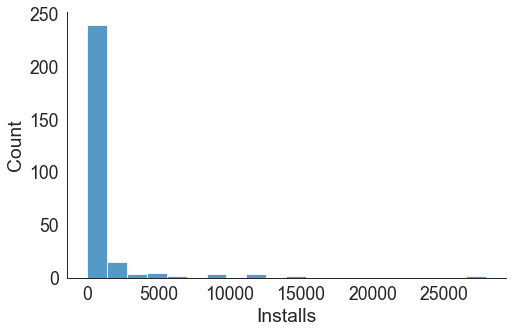

In [11]:
#plotHistogram
sns.set_style("white")
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="Installs", kind="hist", bins = 20, aspect = 1.5)

From the above histogram, it seems that the data distribution has the shape of an exponential distribution. Data is highly skewed in this case meaning some of the apps are heavily popular. To determine the proper distribution, pass the installs data only to the method Fitter().

/opt/homebrew/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/opt/homebrew/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


,sumsquare_error,aic,bic,kl_div
gilbrat,1.430704e-07,3755.912991,-5777.910758,inf
skewcauchy,5.521712e-07,2956.813435,-5406.317315,inf
halfcauchy,5.521918e-07,2954.815867,-5411.909326,inf
beta,6.092525e-07,10191.561534,-5374.055676,inf
halfgennorm,1.011106e-06,3056.536332,-5242.377945,inf


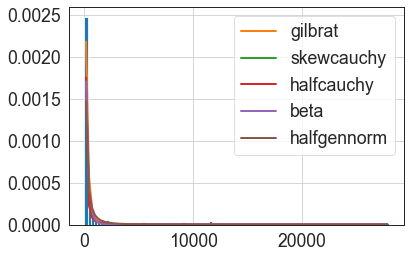

In [12]:
f = Fitter(installs)
f.fit()
f.summary()
        

Fitter() has fetched the best distributions. From the summary above, we can see that gilbrat has the lowest sumsquare_error.

In [13]:
f.get_best(method = "sumsquare_error")

{'gilbrat': {'loc': -43.215636537501915, 'scale': 184.64851200060525}}

/opt/homebrew/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/opt/homebrew/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


,sumsquare_error,aic,bic,kl_div
pareto,1.549173,1280.858057,-1382.745437,inf
ncf,1.549229,1463.707497,-1371.531432,inf
beta,2.260084,3089.617547,-1274.791819,inf
loglaplace,2.396546,1476.474934,-1264.506132,inf
exponweib,2.555313,1564.269865,-1241.520378,inf


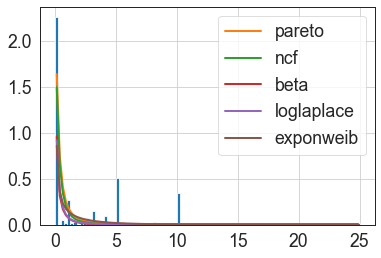

In [14]:
#distribution of flat_pricings
f1 = Fitter(flat_prices)
f1.fit()
f1.summary()

Prices: mean=2.181 stdv=3.476
Installs: mean=783.096 stdv=2511.426


Text(0, 0.5, 'No. of installs')

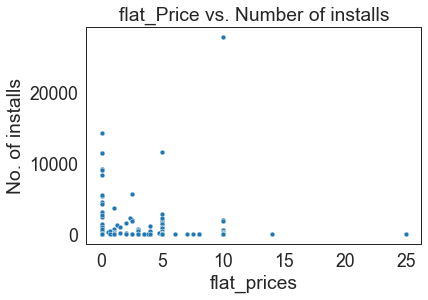

In [16]:
#summarize data plot the correlation
print('Prices: mean=%.3f stdv=%.3f' % (np.mean(flat_prices), np.std(flat_prices)))
print('Installs: mean=%.3f stdv=%.3f' % (np.mean(installs), np.std(installs)))
ax = sns.scatterplot(x=flat_prices, y=installs)
ax.set_title("flat_Price vs. Number of installs")
ax.set_xlabel("flat_prices")
ax.set_ylabel("No. of installs")


In [18]:
#pearson's cofficient
print("Pearson cofficient: {c}".format(c=scipy.stats.pearsonr(flat_prices, installs)[0]))

Pearson cofficient: 0.047191433303795854


/opt/homebrew/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/opt/homebrew/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/opt/homebrew/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: Integratio

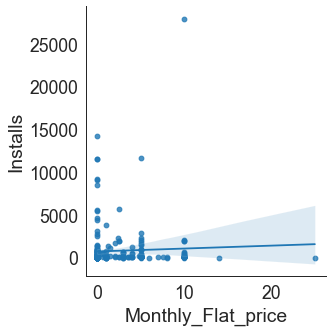

In [19]:
#Add a best fit line
sns.lmplot(x="Monthly_Flat_price", y="Installs", data=df)

Per_User_Prices: mean=0.445 stdv=0.713
Installs: mean=783.096 stdv=2511.426


Text(0, 0.5, 'No. of installs')

/opt/homebrew/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/opt/homebrew/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


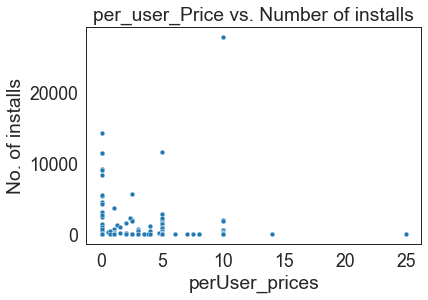

In [20]:
#monthly per_user pricing
print('Per_User_Prices: mean=%.3f stdv=%.3f' % (np.mean(per_user_prices), np.std(per_user_prices)))
print('Installs: mean=%.3f stdv=%.3f' % (np.mean(installs), np.std(installs)))
ax = sns.scatterplot(x=flat_prices, y=installs)
ax.set_title("per_user_Price vs. Number of installs")
ax.set_xlabel("perUser_prices")
ax.set_ylabel("No. of installs")

In [21]:
#pearson's cofficient for monthly per_user pricing
print("Pearson cofficient: {c}".format(c=scipy.stats.pearsonr(per_user_prices, installs)[0]))

Pearson cofficient: 0.18290343231245185


/opt/homebrew/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/opt/homebrew/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/opt/homebrew/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: Integratio

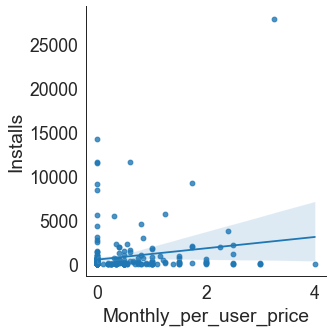

In [22]:
sns.lmplot(x="Monthly_per_user_price", y="Installs", data=df)

Text(0, 0.5, 'No. of installs')

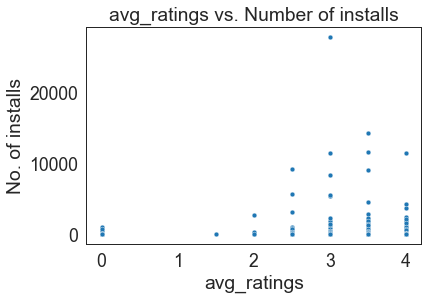

In [25]:
# correlation between ratings and installs
ax = sns.scatterplot(x=avg_ratings, y=installs)
ax.set_title("avg_ratings vs. Number of installs")
ax.set_xlabel("avg_ratings")
ax.set_ylabel("No. of installs")

In [26]:
print("Pearson cofficient: {c}".format(c=scipy.stats.pearsonr(avg_ratings, installs)[0]))

Pearson cofficient: 0.19942075004222415


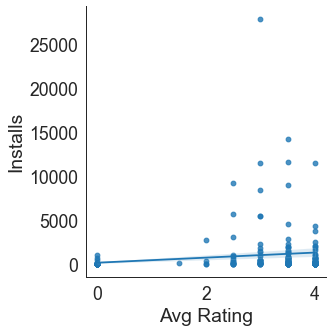

In [27]:
sns.lmplot(x="Avg Rating", y="Installs", data=df);

Text(0, 0.5, 'No. of installs')

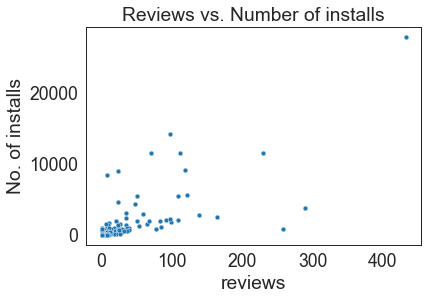

In [28]:
# correlation between reviews and installs
ax = sns.scatterplot(x=reviews, y=installs)
ax.set_title("Reviews vs. Number of installs")
ax.set_xlabel("reviews")
ax.set_ylabel("No. of installs")


In [29]:
print("Pearson cofficient: {c}".format(c=scipy.stats.pearsonr(reviews, installs)[0]))

Pearson cofficient: 0.7434298863214147


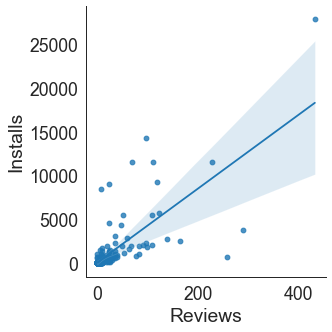

In [32]:
sns.lmplot(x="Reviews", y="Installs", data=df)